# Box plots: An investigation into box plots and their use, with example plots.

### Notebook structure
The notebook is split up into the following sections which are based on the project problem statement requirements. 

* Section One - Getting started with all necessary python libraries/packages
* Section Two - Summarise the history of the box plot and situations in which it is used, explaining relevant terminology. (I have combined two of the project statement requirements in section two as I felt they fitted well together).
* Section Three - Demonstrate the use of the box plot,using data of your choosing.
* Section Four - Compare the box plot to alternatives.
* Section Five - References and conclusion

### Section one - getting started: importing packages
The following Python packages are imported for use in this notebook:
* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org). Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
* NumPy [NumPy](http://www.numpy.org/). NumPy is a Python package for mathemical computing.
* Seaborn [Seaborn](https://seaborn.pydata.org). Seaborn is a Python package used for plotting data.
* Pandas [Pandas](https://pandas.pydata.org). Pandas is a Python package for use with data frames.


In [1]:
#command below ensures plots display correctly in the notebook
%matplotlib inline
#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

### Section Two - Summarise the history of the box plot and it's uses. Explain the structure of a boxplot and it's terminology.

Boxplots were first used in 1969 by mathematician [John Tukey](https://en.wikipedia.org/wiki/John_Tukey), below.
John Tukey was an American  mathematician and the founding chairman of the Princeton statistics department. 
Amongst his many contributions to mathematics and statistics one which most people might recognise was the coining of the term "bit" for Binary digits (this, whilst researching at Bell laboratories).

He introduced boxplots in his 1977 book, "Exploratory Data Analysis." 

Tukey pioneered exploratory data analysis (EDA), believing too great an emphasis was put on confirmatory data analysis (CDA). During my research on Tukey I came across an interesting paper by *John T Behrans* on *Exploratory Data Analysis*$^{1}$in which he refers to Tukey's likening EDA to detective work and also highlights the complementary relationship between EDA and CDA. 

![John Tukey - image source wikipedie](https://upload.wikimedia.org/wikipedia/en/thumb/e/e9/John_Tukey.jpg/220px-John_Tukey.jpg)

The boxplot is a primary tool in EDA, displaying in a graphical manner the variability in the data. They are easily constructed and during research I came across an online lesson from *University of Texas-Houston*$^{2}$covering boxplots which I would highly recommend a look at. 

Boxplots are used to show the distribution of data and show the following five points

* data minimum
* first quartile
* median
* third quartile
* data maximum.

Below I have represented the main features of a box plot.  

![title](https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/img/boxplot.png)


It consists of a rectangular box with whiskers extending from each end to the mimimum and maximum data points. The rectangle itself goes from the first quartile to the third quartile (called the interquartile range) and a line within the box shows the median value of the data. It allows a simple but highly visually effective method of displaying and comparing data distributions. 

For example,if the median is not in the middle of the box the distribution is skewed. Where the median is closer to the bottom, the distribution is positively skewed. Where the median is closer to the top, the distribution is negatively skewed. Therefore, the shape of the boxplot (whisker length and median position) can be used to predict the likely data distribtion. 

To create a boxplot data is split into four equal sized groups.
The lowest 25% goes from the minimum to the first quartile **Q1** - **the end of the whisker to the bottom of the box**. 

The **box itself shows the next 50% of data** with the **median** (middle value) marked as a line within the box. 

The top 25% of data goes from the third quartile **Q3** to the maximum - **the top of the box to the end of the top whisker.**  

The range of data from the Third Quartile to First Quartile (Q3-Q1) is called the **interquartile range** (IQR). 

Any datapoints that are more than 1.5 times the box length (IQR) above Q3 or below Q1 may be outliers. Datapoints more than 3 times the IQR above Q3 or below Q1 are extreme values. Outliers and extreme values are plotted as separate data points rather than as part of the whiskers.

Some possible uses of boxplots would be 
* to compare data from duplicate production lines (to ensure all machines/tools working correctly)
* to look at change over time where external factors might influence data (as I will do in my examples below).
* A simple example might be to compare standardised test results of different schools.
* For large datasets it provides a good first look and would assist in the identification of data that needs cleaning (as I will demonstrate in my second scenario below).

### Section Three - Demonstrate the use of the box plot using data of your choosing.

For this I decided to use a few simple examples based on CAO points. 

Each year Irish Students undergo a state examination called the Leaving Certificate (LC), see a wikipedia page about the examination here, [Leaving Cert](https://en.wikipedia.org/wiki/Leaving_Certificate_(Ireland)). For these LC students entry to third level courses in Ireland is via a central application system [CAO](http://www.cao.ie/). 

For the purpose of allocating college places Leaving cert results are converted to **applicant points** and Third Level institutions review applicant points & available course places and determine the mimimum entry points for the course. Course are then offfered to eligible applicants based on their points, in descending order until the course places are all allocated. If an applicant does not take the offered place subsequent rounds of offers are made unril the course is filled, with course point reductions being made if necessary. The **course points** will therefore be the total points obtained by the last applicant allocated a course place.

This method means that course popularity and number of available places can result in points changing from year to year, therefore it is to a large extent an example of supply and demand. It also means that the spread of student points can vary from year to year. 

In the first simulated example below, example one, a course had a points requirement in 2016 of 365 with a max points of 530, in 2017 a points requirement of 397 with max 495. Intake is unchanged with 39 places allocated in each year. When plotted as boxplots it is apparent that whilst the overall spread of points and the max were greater in 2016; the 2017 median was higher.

It is demonstrating in 2016 the two common scenarios in CAO points, at the higher end you have a student who has an excess of points but has stuck with the course they want; at the lower end the scenario where the demand was not as high as expected and to fill and make the course viable it is decided to drop points and pull in the last few students in a later round of offers. 

I have also used numpy to calculate the five boxplot points and the interquartile range. 

I then used seaborn to generate the same plot and generated some summary statistics, this is to demonstrate how easily a smart looking plot and summary statistics can be generated by even the most novice of users. Something that I feel is extremely relevant in current workplace environments where working with IT systems and data is no longer the sole preserve of the IT department!

In the final part of this section I will bring in a second dataset which represents the variation of points for a different programme, program B across six years. This is intended to show the effect of outliers and unclean data and how a quick visual review with a box plot can highlight data cleansing requirements. 


#### Box Plot Example One

In [2]:
## Sample Data One - below I am reading in a file of mocked up CAO points for a course A
df = pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/mock%20up%20points.csv", header =0)
#df

Min    201600 365   --- Min    201700 397
Q1     201600 398.5 --- Q1     201700 416.5
Median 201600 419.0 --- Median 201700 434.0
Q3     201600 452.5 --- Q3     201700 465.0
Max    201600 530   --- Max    201700 497

Interquartile range 201600 54.0
Interquartile range 201700 48.5


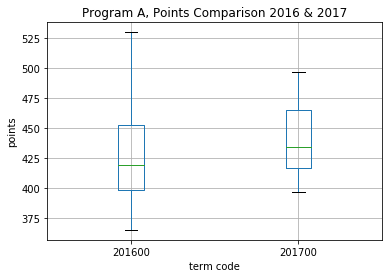

In [3]:
## using mathplotlib I am going to create a boxplot of the dataset

boxplot = df.boxplot(column=['201600','201700'],  return_type='axes')
plt.title ('Program A, Points Comparison 2016 & 2017')
plt.ylabel('points')
plt.xlabel('term code')

## using numpy I am going to calculate the five points of the box plot and the interquartile range

## minimum
min_pts = np.min(df, axis=0)
print("Min    201600", min_pts[0], "  --- Min    201700",min_pts[1])
## Q1
Q1 =np.percentile(df, 25, axis =0)
print ("Q1     201600", Q1[0], "--- Q1     201700", Q1[1])
## median
med =np.median(df,axis =0)
print ("Median 201600", med[0], "--- Median 201700", med[1])
## Q3
Q3 =np.percentile(df, 75, axis=0)
print ("Q3     201600", Q3[0], "--- Q3     201700", Q3[1])
## Maximum
max_pts = np.max(df, axis=0)
print("Max    201600", max_pts[0], "  --- Max    201700",max_pts[1])

##Inter Quartile Range
IR = Q3-Q1

print()
print("Interquartile range 201600", (IR[0]))
print("Interquartile range 201700", (IR[1]))


,201600,201700
count,39.000000,39.000000
mean,427.076923,440.871795
std,41.050921,30.051867
min,365.000000,397.000000
25%,398.500000,416.500000
50%,419.000000,434.000000
75%,452.500000,465.000000
max,530.000000,497.000000


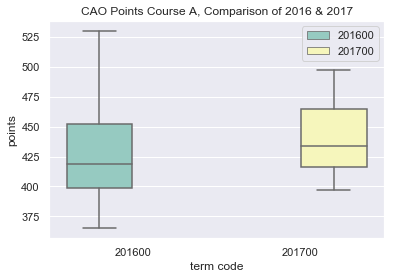

In [4]:
## below I am replicating the above using seaborn.
## I just want to highlight how easily a nice looking plot can be generated.

df1 = pd.DataFrame(data = df, columns = ['201600','201700'])
sns.set(style="darkgrid")
sns.boxplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set3").set_title("CAO Points Course A, Comparison of 2016 & 2017")
plt.legend()
plt.ylabel('points')
plt.xlabel('term code')
# below are descriptive statistics for the data. The min, 25%, 50%, 75% and max are the five points of the boxplot
df.describe()

#### Box Plot Example Two

In [5]:
## I am going to read in a second csv to represent the change in points for a programme across a longer timeframe
## of six years.  
df3= pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/boxplotdata.csv",  header = 0) 
##df3 = pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/boxplotdata.csv",  header = 0) 
df3.head(2)

,2012,2013,2014,2015,2016,2017
0,41,440.0,455.0,455.0,475,455.0
1,410,440.0,460.0,465.0,480,460.0


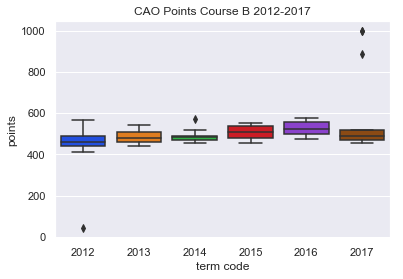

In [6]:
## seaborn box plot of dataset for Course B across six years
## outliers /imcorrect data causing plot to be impossible to review
df4 = pd.DataFrame(data = df3, columns = [ '2012','2013', '2014', '2015','2016','2017'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("CAO Points Course B 2012-2017")
plt.ylabel('points')
plt.xlabel('term code')
plt.show()

Having pulled in the data there are some possible outliers showing:

In 2012 I can see one in 2012 sitting far below the rest of the data, upon investigation it appears to be a typo as it is 41 when all other points in 2012 are three digits and in the range 400-565. 

In 2014 I can see an outlier but upon investigation I decide it is a valid data point as it is within the range of possible LC points.

In 2017 I can see some outliers, upon looking at the plot I can see they are sitting around 900 and 1000. As I am familiar with CAO coding I immediately recognise these as data that should not be in the dataset as thet are codes used by CAO for mature and previous defer students and not part of the dataset I wish to use, that of student LC points. 
I hope the above demonstrates the use of boxplots to perform some quick data analysis and to avoid any indepth analysis of inaccurate datasets.

In [7]:
## I am going to read in as second csv to represent the change in points for a programme across a longer timeframe
## of six years.  
df4= pd.read_csv("boxplotdatacleaned.csv",  header = 0) 
df4.head(2)

,201200,201300,201400,201500,201600,201700
0,NaN,440.0,455.0,455.0,475,455.0
1,410.0,440.0,460.0,465.0,480,460.0


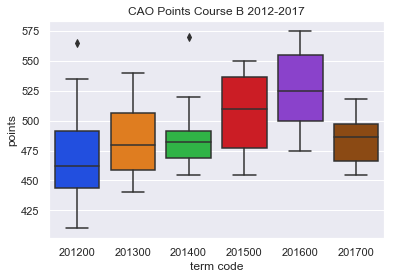

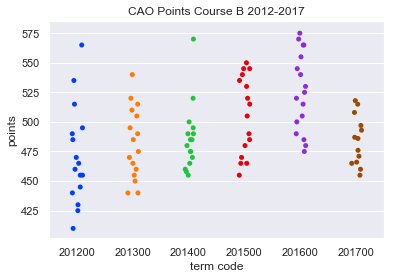

In [8]:
## seaborn box plot of dataset for Course B across six years
## I have also plotted a strip plot to show how it could be used in conjunction with the box plot to show 
##the distribution within the box

#distplot of the cleaned dataset
df5 = pd.DataFrame(data = df4, columns = [ '201200','201300', '201400', '201500','201600','201700'] )
sns.boxplot(x="variable", y="value", palette = "bright", data= pd.melt(df4)).set_title("CAO Points Course B 2012-2017")
plt.ylabel('points')
plt.xlabel('term code')
plt.show()

#  strip plot of the cleaned dataset
df6 = pd.DataFrame(data = df5, columns = [ '201200','201300', '201400', '201500','201600','201700']) #making a dataframe for the plot
sns.stripplot(x="variable",y = "value",data=pd.melt(df6), palette="bright").set_title("CAO Points Course B 2012-2017")
plt.ylabel('points') # title of the y axis
plt.xlabel('term code') # title of the x axis
plt.show()

### Secton Four - Compare the box plot to alternatives.


As boxplots are distribution plots the first alternative to spring to mind is the histogram, below I have plotted example one above as seaborn [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html), both superimposed and side by side.
Whilst it is possible to interpret the plots it is not as visually easy as the box plots where I can compare all six years on the same graph, side by side.

However one limitation of the boxplot versus histograms is that while a dataset might look symmetric (when the median is in the center of the box), it can’t tell you the shape of the symmetry the way a histogram can. this is outlined in an online article by Deborah J. Rumsey $^{3}$ So you could for example have two more dense regions of data within the box either side of the median but that won't be apparent in a box plot, whereas in a histogram it would be represented by longer bars. 

I also investigated the use of a [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html), it shows the distribution of datapoints and it would be useful in conjunction with the box plots to avoid the above mentioned limitation. 

As an aside whilst doing these comparisons it higlighted one major advantage of the boxplot which is that whilst it is lovely in colour colour is not a necessity which is always an advantage when producing draft documents in the workplace and trying to interpret grayscale!

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


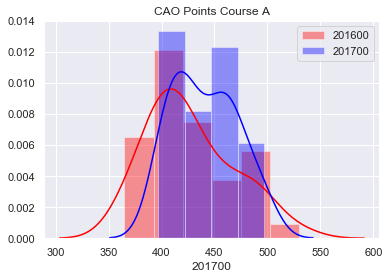

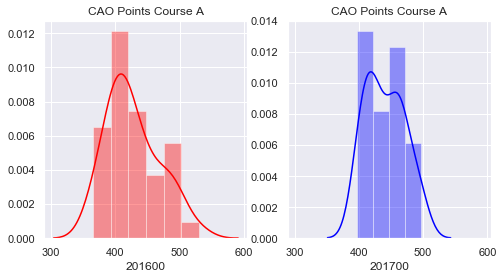

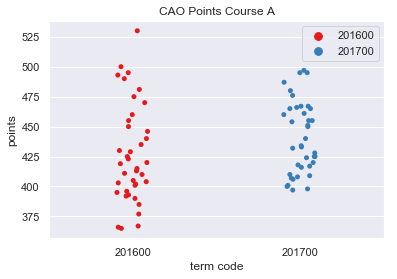

In [9]:
# plot histograms and strip plots of the data in Example One above to demonstrate alternatives to a boxplot
# plots are using Seaborn with added titles & labels and using colours red and blue for 201600 and 201700 respectively.

sns.set(style="darkgrid")#setting the style for all plots

## the first plot is two histograms superimposed 
sns.distplot(df["201600"], label="201600", color="red").set_title("CAO Points Course A")
plt.legend()
sns.distplot(df["201700"], label="201700",color="blue").set_title("CAO Points Course A")
plt.legend()
plt.show()

# the second plot is two side by side histograms
f, axes = plt.subplots(1,2, figsize=(8, 4), sharex=True)
sns.distplot( df["201600"] , color="red", ax=axes[0]).set_title("CAO Points Course A")
sns.distplot( df["201700"] , color="blue", ax=axes[1]).set_title("CAO Points Course A")
plt.show()

# the third plot is a strip plot of the dataset
df1 = pd.DataFrame(data = df, columns = ['201600','201700']) #making a dataframe for the plot
sns.stripplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set1").set_title("CAO Points Course A")
plt.legend()#legend
plt.ylabel('points') # title of the y axis
plt.xlabel('term code') # title of the x axis
plt.show()



### Section Five- references and conclusion

**Specific references**

$^{1}$[Principles and Procedures of Exploratory Data Analysis -John T Behrans](https://pdfs.semanticscholar.org/4016/18eda85f341b0600f49811229cfeb50c2843.pdf)

$^{2}$[Lesson 1.5 Exploratory Data Analysis](https://www.uth.tmc.edu/uth_orgs/educ_dev/oser/L1_5.HTM)

$^{3}$ [What a Boxplot Can Tell You about a Statistical Data Set](https://www.dummies.com/education/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set/)

**General references**

Below are some general references which I used to build up my understanding of box plots and also to assist with seaborn plots.

https://en.wikipedia.org/wiki/Box_plot - box plot wiki page

https://www.tutorialspoint.com/python/python_box_plots.htm - box plot tutorial 

https://www.mathsisfun.com/data/quartiles.html --reminder of how to work out quartiles!

https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn --assistance with SNS box plot

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots - interpreting box lots

https://stats.stackexchange.com/questions/202629/what-information-does-a-box-plot-provide-that-a-histogram-does-not/202663 --discussion around merits of boxplots vs histograms

**Conclusion**

When I started this assignment I had never used boxplots nor had I seen them used by others. I am now left wondering why this is the case as they are both easy to construct (even by hand for smaller datasets) and understand. 

I think that for general review of stats they are easier to understand than histograms and I was particularly taken by the possibility of showing data trends over years and the fact that black and white plots made as much sense as colour, this is a sharp contrast to working with line graphs and others where colour is needed to distinguish data. 
I was also quite taken by strip plots and the combination of box and strip plots. 

### END